# 手書き数字認識(MNIST)

>**References **
>- https://qiita.com/phyblas/items/375ab130e53b0d04f784  
>- ゼロから作るディープラーニング  



---
## ①MNISTデータセットの準備  

1. [mnistのダウンロード](#sklearnを用いてmnistをダウンロード)
1. [描画関数](#描画)
1. [データの分割](#訓練用と検証用データに分割)

---

### sklearnを用いてmnistをダウンロード

In [1]:
import numpy as np
from sklearn import datasets
mnist = datasets.fetch_mldata('MNIST original',data_home=".")
X,Y = mnist.data,mnist.target
x = X/255
y = np.zeros((int(len(Y)),10)) # one hot label
for i in range(len(Y)):
    y[i][ int(Y[i]) ] = 1

print(X.shape)
print(y.shape)

(70000, 784)
(70000, 10)



### 描画

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


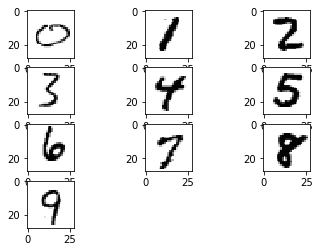

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_number(n):
    plt.imshow(X[n].reshape(28,28),cmap='gray_r')
    
for i in range(10):
    plt.subplot(4,3,i+1)
    plot_number(30+i*6500)
    print(y[30+i*6500])

### 訓練用と検証用データに分割

In [3]:
num_X = len(X)
rp = np.random.permutation(num_X)
thre = int( num_X * 1/7)

train_X, test_X = X[rp[thre:]], X[rp[:thre]]
train_y, test_y = y[rp[thre:]], y[rp[:thre]]

print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


--- 
## ②ニューラルネットワークの設計

1. [損失関数](#損失関数)

---

### 損失関数(loss function)

- ２乗和誤差

\begin{align}
E = \frac{1}{2}\sum_{k}(y_k - y_k^*)^2
\end{align}
$y_k : $  出力  
$y^*_k : $  正解データ

In [4]:
def mean_squared_error(y,t): # ２乗和誤差
    Error = 0.5 * (np.sum((y-t)**2))
    return Error

* 交差エントロピー

\begin{align}
E = - \sum_k y^*_k \log{y_k}
\end{align}

In [5]:
def cross_entropy_error(y,t):
    delta = 1e-7
    Error = -np.sum( t*np.log(y+delta))
    return Error

In [6]:
# sample
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
print(mean_squared_error(y,t))
print(cross_entropy_error(y,t))

0.0975
0.510825457099


### ミニバッチ対応(交差エントロピーver)

In [ ]:
def loss_function(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return cross_entropy_error(y,t) / batch_size